# DSME Bonus Point Assignment I Part B
<div style="text-align: right;font-size: 0.8em">Document Version 1.0.0, released 2020-12-11</div>
For task instructions, refer to the assignment PDF.

* The parts of the code you are to implement are indicated via `# TODO` comments.
* You can use the `# Test code` cells to verify your implementation. However note that these are not the unit tests used for grading.
* Some cells create export file in the `solution/` folder. _Include whole `solution/` folder in your submission_.
* DO NOT CLEAR THE OUTPUT of the notebook you are submitting!

In [1]:
# General imports
from pathlib import Path
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm.auto import tqdm

# Enable reproducibility
torch.manual_seed(0)
torch.set_deterministic(True)

# Create solution folder
Path("solution/").mkdir(exist_ok=True)

In case you are missing dependencies (e.g. `ModuleNotFoundError: No module named ...`), run
```sh
conda install -y pandas seaborn scikit-learn pytorch torchvision cpuonly -c pytorch
```
in a terminal.

## Question B1 - Data Preprocessing
### a) Dataset Loading

In [2]:
# TODO Read CSV file
# df = 

df= pd.read_csv("energy-weather.cvs")


In [3]:
# Test code
assert 'df' in locals(), "Variable df is not defined"
np.testing.assert_array_equal(df.columns, ['time', 'temperature', 'pressure','humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'clouds_all', 'generation_solar'])
np.testing.assert_equal(len(df), 30046)
"ok"

'ok'

### b) Filtering

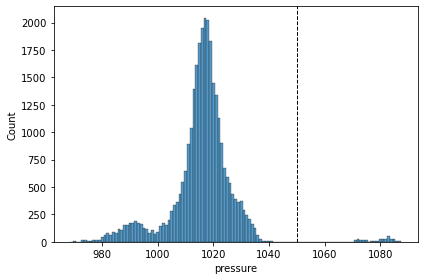

In [4]:
# Show histogram of pressure
sns.histplot(data=df["pressure"], discrete=True)
plt.axvline(1050, c="black", linestyle="dashed",linewidth=1)
plt.tight_layout()

In [5]:
# TODO Remove outliers from the data set
# df_filtered =

df_filtered = df[(df["pressure"] <= 1050) & (df["wind_speed"] <= 30)]


In [6]:
# Test code
assert 'df_filtered' in locals(), "Variable df_filtered is not defined"
assert (df_filtered["pressure"] <= 1050).all(), "contains pressure > 1050"
assert (df_filtered["wind_speed"] <= 30).all(), "contains wind_speed > 30"
assert len(df_filtered) == 29731, "Dropped too many rows"
"ok"

'ok'

### c) Additional features

In [7]:
# TODO Introduce day feature
# df_filtered.loc[:, "day"] = 

df_filtered.loc[:, "day"] = pd.to_datetime(df_filtered["time"]).dt.dayofyear

# TODO Introduce generation_solar_categorical feature
# df_filtered.loc[:, "generation_solar_categorical"] = 

#df_filtered.loc[: "generation_solar_categorical"] = ""
df_filtered.loc[df_filtered["generation_solar"] <160, "generation_solar_categorical"] = "low"
df_filtered.loc[(df_filtered["generation_solar"] >=160) & (df_filtered["generation_solar"] <1600), "generation_solar_categorical"] = "medium"
df_filtered.loc[df_filtered["generation_solar"] >=1600, "generation_solar_categorical"] = "high"
df_filtered["generation_solar_categorical"] = df_filtered["generation_solar_categorical"].astype('category')

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [8]:
# Test code
assert all(df_filtered.loc[df_filtered["time"] == "2015-03-02 21:00:00", "day"] == 61)
assert all(df_filtered.loc[df_filtered["time"] == "2018-08-06 11:00:00", "day"] == 218)

assert all(df_filtered["generation_solar_categorical"][df_filtered["generation_solar"] < 160] == "low"), "low label not correct"
assert all(df_filtered["generation_solar_categorical"][(160 <= df_filtered["generation_solar"]) & (df_filtered["generation_solar"] < 1600)] == "medium"), "medium label not correct"
assert all(df_filtered["generation_solar_categorical"][1600 <= df_filtered["generation_solar"]] == "high"), "high label not correct"
"ok"

'ok'

### d) Normalize Data

In [9]:
# TODO Standardize the dataset
# df_filtered = 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_filtered[['temperature', 'pressure','humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'clouds_all', 'generation_solar','day']] = scaler.fit_transform(df_filtered[['temperature', 'pressure','humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'clouds_all', 'generation_solar', 'day']])


<ipython-input-9-4576c0caa314>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['temperature', 'pressure','humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'clouds_all', 'generation_solar','day']] = scaler.fit_transform(df_filtered[['temperature', 'pressure','humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'clouds_all', 'generation_solar', 'day']])
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [10]:
# Test code
assert "time" in df_filtered.columns
assert "generation_solar_categorical" in df_filtered.columns

for f in ["temperature", "pressure", "humidity", "wind_speed", "wind_deg", "rain_1h", "clouds_all", "generation_solar", "day"]:
    assert np.isclose(np.mean(df_filtered[f]), 0), f"{f} is not standardized"
    assert np.isclose(np.std(df_filtered[f]), 1), f"{f} is not standardized"

"ok"

'ok'

### e) Train/Validation split

In [11]:
# TODO Train-validation split
# df_train = 
# df_val =

from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df_filtered, test_size=0.1)



In [12]:
# Test code
assert len(df_train) == 26757, "df_train has wrong size"
assert len(df_val) == 2974, "df_test has wrong size"
assert not df_val.index.isin(df_train.index).any(), "df_test and df_train not disjunct"
assert not df_train.index.isin(df_val.index).any(), "df_test and df_train not disjunct"

# Export data sets
df_train.to_csv("solution/b1e-train.csv", index=False)
df_val.to_csv("solution/b1e-val.csv", index=False)

"ok"

'ok'

## Question B2 - Modelling with scikit-learn

### a) Linear regression

In [39]:
from sklearn.linear_model import LinearRegression

predictors = ["day", "temperature", "pressure", "humidity", "wind_speed", "wind_deg", "rain_1h", "clouds_all"]
target = "generation_solar"

# ********************
# TODO Fit linear model
# model =

model = LinearRegression().fit(df_train[predictors], df_train[target])



MSE linear: 0.6458410167524934


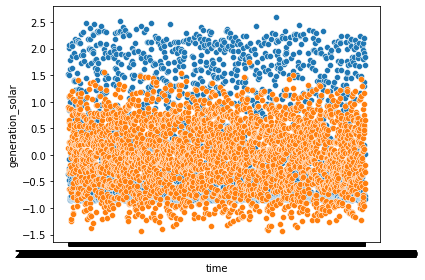

In [40]:
# Test Code
assert "model" in locals(), "Model not implemented"
assert model.coef_.shape == (8, ), "Wrong number of predictors"
_pred = model.predict(df_val[predictors])
sns.scatterplot(x=df_val["time"], y=df_val[target])
sns.scatterplot(x=df_val["time"], y=_pred)
plt.tight_layout()
plt.savefig("solution/b2a.png")
mse = np.mean((_pred - df_val[target])**2)
print(f"MSE linear: {mse}")

### b) Linear regression with non-linear basis functions

In [51]:
from sklearn.preprocessing import PolynomialFeatures

# TODO Create polynomial feature transformation
# poly =
poly = PolynomialFeatures(4)
polyF = poly.fit_transform(df_train[predictors])

# TODO Fit linear model
# model_poly =
model_poly = LinearRegression().fit(polyF, df_train[target])


In [52]:
# Test Code
assert "model_poly" in locals(), "model_poly not implemented"
_pred = model_poly.predict(poly.transform(df_val[predictors]))
#sns.scatterplot(x=df_val["time"], y=df_val[target])
#sns.scatterplot(x=df_val["time"], y=_pred)
#plt.tight_layout()
#plt.savefig("solution/b2b.png")
mse = np.mean((_pred - df_val[target])**2)
print(f"MSE poly: {mse}")

MSE poly: 0.5230400662788189


### b) Classification

In [17]:
from sklearn.linear_model import RidgeClassifier

target = "generation_solar_categorical"

# TODO Fit classifier
# model_cls =
model_cls = RidgeClassifier().fit(df_train[predictors], df_train[target])




In [18]:
# Test Code
assert "model_cls" in locals(), "model_cls not implemented"
from sklearn.metrics import classification_report
print(classification_report(df_val[target], model_cls.predict(df_val[predictors]), digits=4))

              precision    recall  f1-score   support

        high     0.6081    0.8081    0.6940       985
         low     0.5808    0.7056    0.6371      1009
      medium     0.5604    0.2510    0.3467       980

    accuracy                         0.5898      2974
   macro avg     0.5831    0.5883    0.5593      2974
weighted avg     0.5831    0.5898    0.5603      2974



## Question B3 - Modelling with PyTorch

In [13]:
# Build data loaders for PyTorch
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

predictors = ["day", "temperature", "pressure", "humidity", "wind_speed", "wind_deg", "rain_1h", "clouds_all"]

x_train = torch.tensor(df_train[predictors].values,  dtype=torch.float)
x_val = torch.tensor(df_val[predictors].values,  dtype=torch.float)

y_train = torch.tensor(df_train[["generation_solar"]].values,  dtype=torch.float)
y_val = torch.tensor(df_val[["generation_solar"]].values,  dtype=torch.float)


y_train_cat = torch.tensor(df_train["generation_solar_categorical"].cat.codes.values.copy(),  dtype=torch.int64)
y_val_cat = torch.tensor(df_val["generation_solar_categorical"].cat.codes.values.copy(),  dtype=torch.int64)


# For regression
dataset = TensorDataset(x_train, y_train)

# For classification
dataset_cat = TensorDataset(x_train, y_train_cat)

### a) Build a network

In [20]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # TODO Create layers
        self.fc1 = nn.Linear(8, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        # TODO Implement forward pass
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()

In [21]:
# Test code
np.testing.assert_array_equal([p.nelement() for p in net.parameters()], [80, 10, 100, 10, 10, 1])
np.testing.assert_array_equal(net(torch.zeros(32, 8)).shape, [32, 1])
"ok"

NameError: name 'net' is not defined

### b) Regression

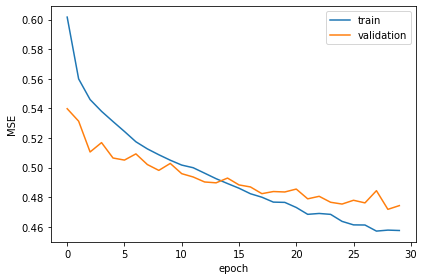

In [22]:
# TODO: Tune typerparameters 
# Hyperparameters
learn_rate = 0.0006
epochs = 30
batch_size = 64

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # TODO Create layers
        self.fc1 = nn.Linear(8, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        

    def forward(self, x):
        # TODO Implement forward pass
        x = nn.functional.leaky_relu(self.fc1(x))
        x = nn.functional.dropout(x, p= 0.1)
        x = nn.functional.leaky_relu(self.fc2(x))
        x = nn.functional.leaky_relu(self.fc3(x))
        x = self.fc4(x)
        return x
net = Net()


criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=learn_rate)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

losses = []
with tqdm(range(epochs)) as pbar:
    for epoch in pbar:  # loop over the dataset multiple times
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(dataloader):
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item() * inputs.shape[0]
        losses.append([running_loss / len(dataset), criterion(net(x_val), y_val).item()])
        pbar.set_description(f"MSE {losses[-1][0]:.02f}/{losses[-1][1]:.02f}")

# Save model
with open("solution/b3b.pt", "wb") as f:
    torch.save(net, f)

# Plot loss
losses = np.array(losses)
plt.plot(np.arange(len(losses)), losses[:,0], label="train")
plt.plot(np.arange(len(losses)), losses[:,1], label="validation")
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.legend()
plt.tight_layout()
plt.savefig("solution/b3b.png")

### c) Classification

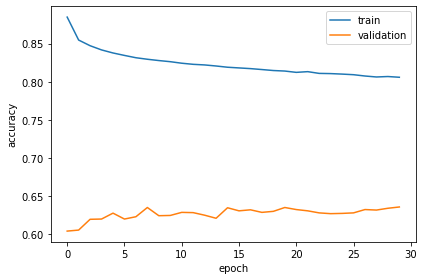

In [69]:
# TODO: Tune typerparameters 
# Hyperparameters
learn_rate = 0.001
epochs = 30
batch_size = 48

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # TODO Create layers
        self.fc1 = nn.Linear(8, 128)
        self.fc2 = nn.Linear(128, 3)
        #self.fc3 = nn.Linear(64, 3)
        
    def forward(self, x):
        # TODO Implement forward pass
        x = nn.functional.leaky_relu(self.fc1(x))
        #x = nn.functional.leaky_relu(self.fc2(x))
        x = self.fc2(x)
        return x
net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learn_rate)
dataloader_cat = DataLoader(dataset_cat, batch_size=batch_size, shuffle=True)

losses=[]
with tqdm(range(epochs)) as pbar:
    for epoch in pbar:  # loop over the dataset multiple times
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(dataloader_cat):
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item() * inputs.shape[0]
        #losses.append([running_loss / len(dataset), 1-torch.sum((torch.argmax(net(x_val), dim=1) == y_val_cat)) / len(x_val)])
        losses.append([running_loss / len(dataset), torch.sum((torch.argmax(net(x_val), dim=1) == y_val_cat)) / len(x_val)])
        pbar.set_description(f"Loss {losses[-1][0]:.02f}/{losses[-1][1]:.02f}")

# Save model
with open("solution/b3c.pt", "wb") as f:
    torch.save(net, f)

# Plot loss
losses = np.array(losses)
plt.plot(np.arange(len(losses)), losses[:,0], label="train")
plt.plot(np.arange(len(losses)), losses[:,1], label="validation")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.tight_layout()
plt.savefig("solution/b3c.png")

### d) Evaluation

Which model do you think is suited the best for modelling `generation_solar` and why? Please write down your answer below.

9860
